In [1]:
!nvidia-smi

Sun Jul 25 15:14:48 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# Mounting the drive and copying the code from github to drive...deeplearn1laknb@gmail.com

from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!unzip -q "/content/gdrive/MyDrive/YoloV3-master.zip"
!ls

gdrive	sample_data  YoloV3-master


In [23]:
import time
import glob
import torch
import os
from os import listdir
from PIL import Image 
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.9.0+cu102 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)


In [5]:
ls

gdrive/  sample_data/  YoloV3-master/


In [6]:
cd YoloV3-master/

/content/YoloV3-master


In [7]:
!ls

 annotation_tool   models.py	  results.png	    train_batch0.png    weights
 cfg		   output	  results.txt	    train.py
 data		   __pycache__	  test_batch0.png  'ubdivisions=1'
 detect_2.py	   README.md	  test.py	    utils
 detect.py	   results.json   ting		    vim.exe.stackdump


In [8]:
#!cp /content/gdrive/MyDrive/yolov3-spp-ultralytics.pt /content/YoloV3-master/weights/
!cp /content/gdrive/MyDrive/EVA6_P1_S11/last.pt /content/YoloV3-master/weights/

In [ ]:
#!rm ./data/customdata/images/an_img_075.jpg

rm: cannot remove './data/customdata/images/an_img_075.jpg': No such file or directory


In [ ]:
!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 25 --nosave 

!cp -r /content/YoloV3-master/weights/last.pt /content/gdrive/MyDrive/EVA6_P1_S11

usage: train.py [-h] [--epochs EPOCHS] [--batch-size BATCH_SIZE]
                [--accumulate ACCUMULATE] [--cfg CFG] [--data DATA]
                [--multi-scale] [--img-size IMG_SIZE [IMG_SIZE ...]] [--rect]
                [--resume] [--nosave] [--notest] [--evolve] [--bucket BUCKET]
                [--cache-images] [--weights WEIGHTS] [--name NAME]
                [--device DEVICE] [--adam] [--single-cls]
train.py: error: unrecognized arguments: --initial_lr 0.25


In [ ]:
!python detect.py --conf-thres 0.1 --output "/content/gdrive/My Drive/YoloV3-master/Output_Annotated_Video" --source "/content/gdrive/MyDrive/EVA6_P1_S11/Combined.mp4"

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='/content/gdrive/My Drive/YoloV3-master/Output_Annotated_Video', save_txt=False, source='/content/gdrive/MyDrive/EVA6_P1_S11/Combined.mp4', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15109MB)

Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
video 1/1 (1/4830) /content/gdrive/MyDrive/

In [9]:
!python detect_2.py --conf-thres 0.1 --output out_out

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='out_out', save_txt=False, source='data/customdata/assignment_images', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15109MB)

Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
image 1/20 data/customdata/assignment_images/an_img_000.jpg: 512x512 5 hardhats, 1 bootss, Done. (0.045s)
image 

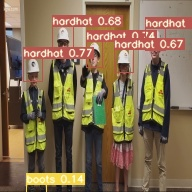

In [12]:
Image(filename='/content/YoloV3-master/out_out/an_img_000.jpg', width=600)

In [13]:
!cp -r /content/YoloV3-master/out_out /content/gdrive/MyDrive/EVA6_P1_S11

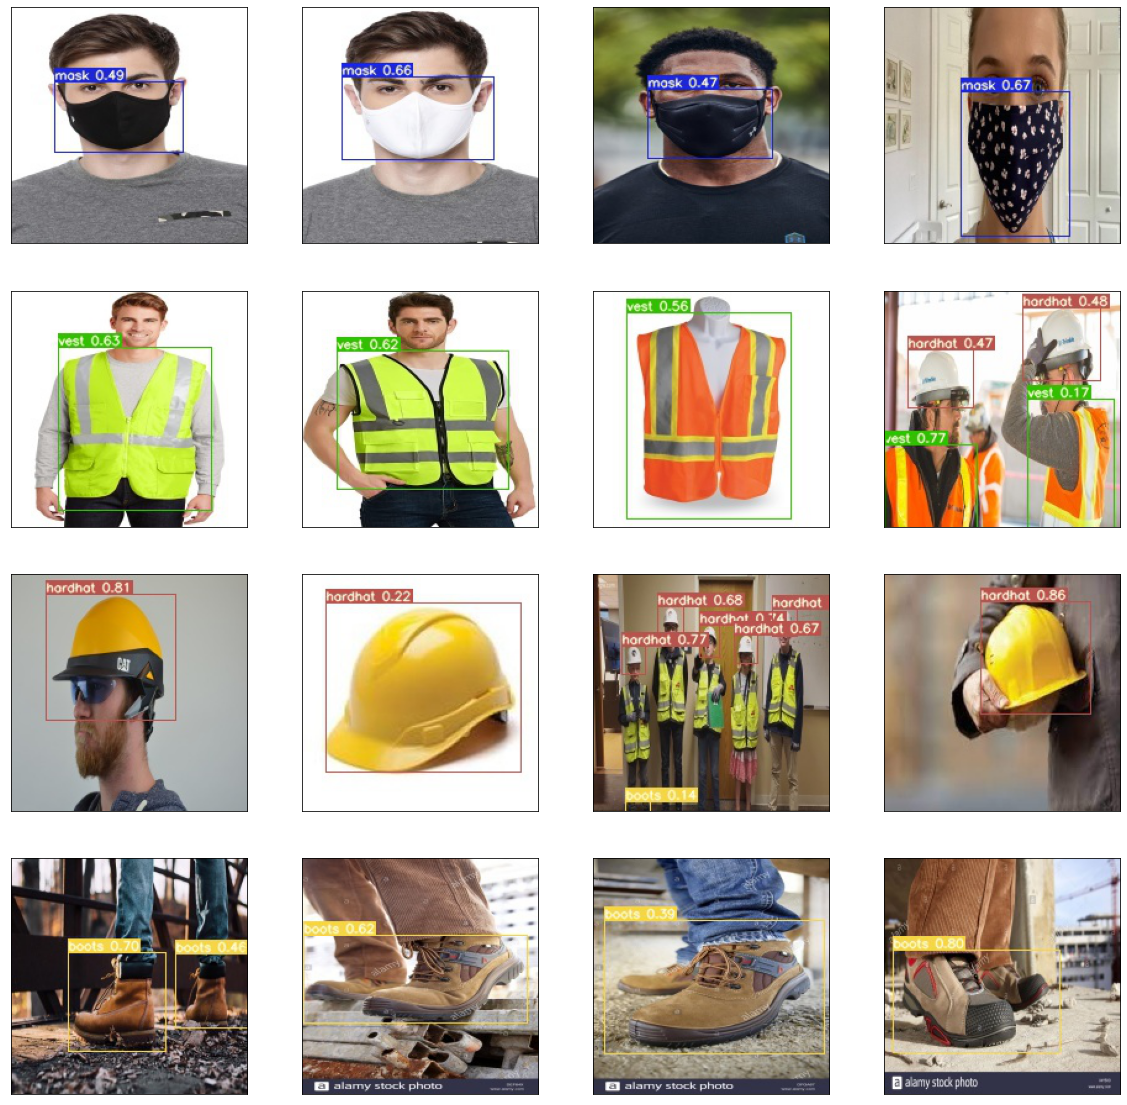

In [32]:
imagesList = ['an_img_009.jpg', 'an_img_010.jpg', 'an_img_012.jpg', 'an_img_013.jpg', 
              'an_img_022.jpg', 'an_img_044.jpg', 'an_img_060.jpg', 'an_img_093.jpg', 
              'an_img_023.jpg', 'an_img_045.jpg', 'an_img_000.jpg', 'an_img_066.jpg', 
              'an_img_087.jpg', 'an_img_088.jpg', 'an_img_089.jpg', 'an_img_090.jpg']

def loadImages(path):
    loadedImages = []
    for image in imagesList:
        img = Image.open(path + image)
        loadedImages.append(img)
    return loadedImages

path = "/content/YoloV3-master/out_out/"
fig = plt.figure(figsize=(20, 20))
imgs = loadImages(path)

for idx, img in enumerate(imgs):
    ax = fig.add_subplot(4, 4, idx + 1, xticks=[], yticks=[])
    plt.imshow(np.asarray(img))